In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000).T

In [26]:
df=pd.DataFrame()

In [27]:
df['exp(in months)']=m[0]
df['salary(in thousands)']=m[1]

In [28]:
df.head()

,exp(in months),salary(in thousands)
0,29.590281,26.067097
1,18.571923,25.476230
2,20.127230,27.675662
3,23.780064,19.382308
4,9.458174,10.109171


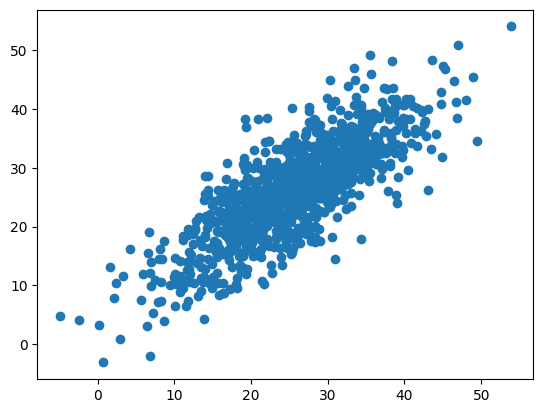

In [29]:
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])

In [30]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values

In [31]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [33]:
print(X_train.shape)
print(X_test.shape)

(800, 1)
(200, 1)


In [34]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [35]:
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
y_pred=regressor.predict(X_test)

In [37]:
# Finding the Coefs and intercept

# Equation of line is given by y=mx+b
# y=0.81*x + 5.50
# m ---> slope
# b ---> intercept

# X coefficient
print(regressor.coef_[0])

# Y intercept
print(regressor.intercept_)

0.791764284938072
5.856496834419129


In [38]:
df_error = pd.DataFrame()
df_error['y_test'] = y_test
df_error['y_pred'] = y_pred  # Make sure y_pred is also from test set
df.shape


(1000, 2)

In [39]:
df_error

,y_test,y_pred
0,31.141437,25.747031
1,19.168907,25.544303
2,24.683526,18.466601
3,29.695944,32.362575
4,16.439498,20.184050
...,...,...
195,26.221553,18.883844
196,23.353751,23.117335
197,25.746095,32.053075
198,46.956554,32.362425


In [45]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

4.152770002755785

In [41]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

27.876447992357008

In [42]:
# Root Mean Squared Error
mse=mean_squared_error(y_test,y_pred)

np.sqrt(mse)

np.float64(5.2798151475555475)

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6410087479570199

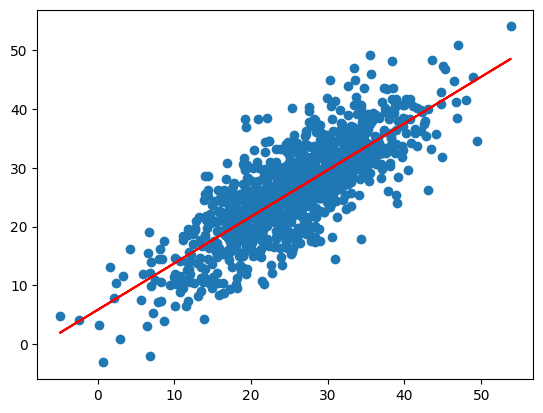

In [44]:
# Visualising the regression line
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])